## Running through a toy example to get a refresher on image segmentation
- Loading a pretrained model
- https://learnopencv.com/pytorch-for-beginners-semantic-segmentation-using-torchvision/

In [1]:
import os
os.chdir("..")

In [2]:
from torchvision import models

from PIL import Image
import matplotlib.pyplot as plt
import torch

In [ ]:
# Pretrained model with resnet101 backbone
# NOTE: The .eval() method will load it in inference mode.
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [ ]:
#!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./bird.png')
plt.imshow(img)
plt.show()

In [ ]:
# Preprocessing the image
# Apply the transformations needed 
import torchvision.transforms as T
trf = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor(), T.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])]) 
# Compose is a great function that takes in a list in which each elemtn is of *transforms type
# So we can pass compose a batch of images and all required transformations will be applied to the images.

inp = trf(img).unsqueeze(0)

In [ ]:
# Forward pass through the network
# Pass the input through the net 
out = fcn(inp)['out'] 
print(out.shape)

In [ ]:
import numpy as np 
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy() 
print(om.shape)
print(np.unique(om))

In [ ]:
# Define the helper function
def decode_segmap(image, nc=21):
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
  rgb = np.stack([r, g, b], axis=2)
  return rgb

In [ ]:
rgb = decode_segmap(om) 
plt.imshow(rgb); plt.show()

In [ ]:
def segment(net, path, show_orig=True):
  img = Image.open(path)
  if show_orig:
    plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(256), 
                   T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()

In [ ]:
segment(fcn, './horse.png')

In [ ]:
# Now let's try segmentation using DeepLab
# NOTE: Deeplab is a Semantic Segmentation Architecture that came out of Google Brain

dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()
	
segment(dlab, './horse.png')

In [ ]:
img = Image.open('./dog-park.png')
plt.imshow(img); plt.show()
print ('Segmenatation Image on FCN')
segment(fcn, path='./dog-park.png', show_orig=False)
print ('Segmenatation Image on DeepLabv3')
segment(dlab, path='./dog-park.png', show_orig=False)

mars image

In [ ]:
def segment(net, path, show_orig=True):
  img = Image.open(path)
  if show_orig:
    plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(256), 
                   T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])
                               ])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()

In [ ]:
img_path = '../data/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_397681398EDR_F0020000AUT_04096M1.JPG'
img_path = './dog-park.png'
img = Image.open(img_path)
plt.imshow(img); plt.show()
print ('Segmenatation Image on FCN')
segment(fcn, path=img_path, show_orig=False)
print ('Segmenatation Image on DeepLabv3')
segment(dlab, path=img_path, show_orig=False)

In [ ]:
img_path = '../data/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_397681398EDR_F0020000AUT_04096M1.JPG'
img = Image.open(img_path)
img

In [ ]:
import skimage

i = skimage.io.imread('../data/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_397681398EDR_F0020000AUT_04096M1.JPG')
i.shape

Image segmentation using DeeplabV3+ from PyTorch. 
- Starting first with a toy example on the face semgentation dataset 
- https://towardsdatascience.com/transfer-learning-for-segmentation-using-deeplabv3-in-pytorch-f770863d6a42
- Then applying it to our data

In [3]:
from torch.utils.data import DataLoader
from torchvision import transforms

from pathlib import Path
from typing import Any, Callable, Optional

import numpy as np
from PIL import Image
from torchvision.datasets.vision import VisionDataset

from src.segdataset import SegmentationDataset

In [4]:
seg_dataset = SegmentationDataset("data/CrackForest", "Images", "Masks", transforms=transforms.Compose([transforms.ToTensor()]))
seg_dataloader = DataLoader(seg_dataset, batch_size=32, shuffle=False)
samples = next(iter(seg_dataloader))

In [5]:
display(samples['image'].shape,
samples['mask'].shape)

torch.Size([32, 3, 320, 480])

torch.Size([32, 1, 320, 480])

In [6]:
img = transforms.ToPILImage()(samples['image'][5])
mask = transforms.ToPILImage()(samples['mask'][5])

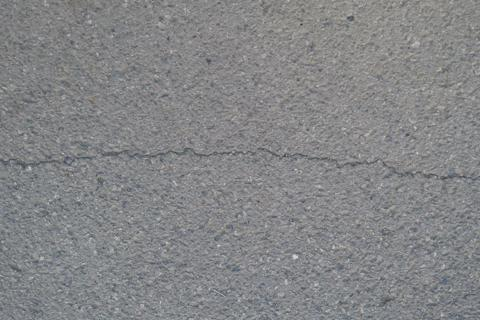

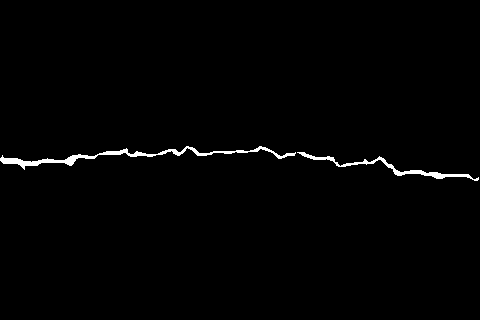

In [7]:
display(img, mask)

Running main.py in individual cells to break it down

In [8]:
from pathlib import Path

import click
import torch
from sklearn.metrics import f1_score, roc_auc_score
from torch.utils import data

import src.datahandler
from src.model import createDeepLabv3
from src.trainer import train_model

In [9]:
model = createDeepLabv3()

c:\Users\Shoon\repos\DGMDE-17-Final-Project\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Shoon\repos\DGMDE-17-Final-Project\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
model.train()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [11]:
data_directory = Path("data/CrackForest/")
exp_directory  = Path("experiments/testing_crack_dataset")

In [12]:
if not exp_directory.exists():
    os.makedirs(exp_directory)

In [13]:
# Specify the loss function
criterion = torch.nn.MSELoss(reduction='mean')
# Specify the optimizer with a lower learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Specify the evaluation metrics
metrics = {'f1_score': f1_score, 'auroc': roc_auc_score}

In [14]:
import src.datahandler as datahandler
from src.trainer import train_model

epochs = 25
batch_size = 4


dataloaders = datahandler.get_dataloader_single_folder(
    data_directory, batch_size=batch_size)


_ = train_model(model,
                criterion,
                dataloaders,
                optimizer,
                bpath=exp_directory,
                metrics=metrics,
                num_epochs=epochs)

DEVICE:  cpu
Epoch 1/25
----------


  8%|▊         | 2/24 [00:45<08:21, 22.79s/it]


KeyboardInterrupt: 

In [ ]:
# Save the trained model
torch.save(model, exp_directory / 'weights.pt')